In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

14.951216425115717 89.48537707987282
-50.47178628249057 37.200001230638776
28.331850427689545 31.475420778330516
-39.71439269639822 -106.4539661321328
8.510403389388301 -161.49235522777704
-10.757522200037442 -99.38099844695758
-77.57640784747841 88.84649450007856
30.604557551595164 -153.90797003284766
-88.13906975443568 52.411555050126935
51.2555209512758 -21.14420815815629
-49.551962491580554 86.93250765940593
41.875461914035526 164.43087756833597
-24.469193878744875 -38.8011832918869
-81.29822536901548 157.42208669677848
80.36844868792457 69.84366509791099
38.29433906732257 12.522614938724757
-67.13077585480016 -83.9307126708593
-34.3545999665036 -26.95503571218623
32.683604519477484 -84.22477823460365
71.46623673679952 166.6541461808527
10.973655193245463 -18.134522557384827
50.33864719060264 -154.5489396813509
-71.93746444435175 76.83808924700247
-89.34963925192676 -164.78830403995505
38.16262381105301 -171.61101413734536
10.300405736843857 102.0914337706958
-24.469821566331618 13

In [5]:
from citipy import citipy


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=abb01a2321e6366975fa3d162e508d4c


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | beni mazar
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | ahuimanu
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | dingle
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | armacao dos buzios
City not found. Skipping...
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | erice
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | thomaston
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | oussouye
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | mata

Processing Record 40 of Set 4 | paamiut
Processing Record 41 of Set 4 | les cayes
Processing Record 42 of Set 4 | faya
Processing Record 43 of Set 4 | fomboni
Processing Record 44 of Set 4 | khatanga
Processing Record 45 of Set 4 | big spring
Processing Record 46 of Set 4 | komsomolskiy
Processing Record 47 of Set 4 | chara
Processing Record 48 of Set 4 | corinto
Processing Record 49 of Set 4 | karratha
Processing Record 50 of Set 4 | meyungs
City not found. Skipping...
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | haines junction
Processing Record 3 of Set 5 | kidal
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | silchar
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | turkan
Processing Record 8 of Set 5 | mecca
Processing Record 9 of Set 5 | cartagena
Processing Record 10 of Set 5 | clyde river
Processing Record 11 of Set 5 | barda
Processing Record 12 of Set 5 | gravdal
Processing Record 13 of Set 5 | comodoro ri

Processing Record 30 of Set 8 | colac
Processing Record 31 of Set 8 | ust-nera
Processing Record 32 of Set 8 | dali
Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | vari
Processing Record 35 of Set 8 | salon-de-provence
Processing Record 36 of Set 8 | guanica
Processing Record 37 of Set 8 | belaya gora
Processing Record 38 of Set 8 | bowen
Processing Record 39 of Set 8 | kaitangata
Processing Record 40 of Set 8 | mangan
Processing Record 41 of Set 8 | gimli
Processing Record 42 of Set 8 | san patricio
Processing Record 43 of Set 8 | codrington
Processing Record 44 of Set 8 | farkhor
Processing Record 45 of Set 8 | deputatskiy
Processing Record 46 of Set 8 | sedelnikovo
City not found. Skipping...
Processing Record 47 of Set 8 | beringovskiy
Processing Record 48 of Set 8 | ranong
Processing Record 49 of Set 8 | lalosu
Processing Record 50 of Set 8 | upata
Processing Record 1 of Set 9 | ordynskoye
Processing Record 2 of Set 9 | vannes
Processing Record 3 of Set 9 | 

Processing Record 16 of Set 12 | viru
Processing Record 17 of Set 12 | rio grande
Processing Record 18 of Set 12 | karwar
Processing Record 19 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 20 of Set 12 | nhulunbuy
Processing Record 21 of Set 12 | maldonado
Processing Record 22 of Set 12 | severnoye
Processing Record 23 of Set 12 | san guillermo
Processing Record 24 of Set 12 | paranaiba
Processing Record 25 of Set 12 | concordia
Processing Record 26 of Set 12 | tartagal
Processing Record 27 of Set 12 | praxedis guerrero
Processing Record 28 of Set 12 | cururupu
Processing Record 29 of Set 12 | konevo
Processing Record 30 of Set 12 | phitsanulok
Processing Record 31 of Set 12 | goderich
Processing Record 32 of Set 12 | morondava
Processing Record 33 of Set 12 | houston
Processing Record 34 of Set 12 | bikaner
Processing Record 35 of Set 12 | ohara
Processing Record 36 of Set 12 | sinegorye
Processing Record 37 of Set 12 | gat
Processing Record 38 of Set 12 | alekseye

In [11]:
len(city_data)

552

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Blair,11.6667,92.7500,84.40,75,98,11.25,IN,2022-07-18 04:13:50
1,East London,-33.0153,27.9116,68.11,33,0,7.23,ZA,2022-07-18 04:13:50
2,Beni Mazar,28.4962,30.8029,76.46,54,0,7.45,EG,2022-07-18 04:13:51
3,Ancud,-41.8697,-73.8203,40.23,74,25,6.26,CL,2022-07-18 04:13:51
4,Hilo,19.7297,-155.0900,86.29,91,100,9.22,US,2022-07-18 04:13:51
5,Puerto Ayora,-0.7393,-90.3518,68.56,92,69,5.01,EC,2022-07-18 04:13:51
6,Busselton,-33.6500,115.3333,61.59,63,17,12.55,AU,2022-07-18 04:13:52
7,Ahuimanu,21.4447,-157.8378,83.91,74,75,18.41,US,2022-07-18 04:13:52
8,Port Alfred,-33.5906,26.8910,64.18,44,3,4.00,ZA,2022-07-18 04:13:52
9,Dingle,10.9995,122.6711,78.15,91,100,7.29,PH,2022-07-18 04:13:53


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity','Cloudiness',
'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Blair,IN,2022-07-18 04:13:50,11.6667,92.7500,84.40,75,98,11.25
1,East London,ZA,2022-07-18 04:13:50,-33.0153,27.9116,68.11,33,0,7.23
2,Beni Mazar,EG,2022-07-18 04:13:51,28.4962,30.8029,76.46,54,0,7.45
3,Ancud,CL,2022-07-18 04:13:51,-41.8697,-73.8203,40.23,74,25,6.26
4,Hilo,US,2022-07-18 04:13:51,19.7297,-155.0900,86.29,91,100,9.22
5,Puerto Ayora,EC,2022-07-18 04:13:51,-0.7393,-90.3518,68.56,92,69,5.01
6,Busselton,AU,2022-07-18 04:13:52,-33.6500,115.3333,61.59,63,17,12.55
7,Ahuimanu,US,2022-07-18 04:13:52,21.4447,-157.8378,83.91,74,75,18.41
8,Port Alfred,ZA,2022-07-18 04:13:52,-33.5906,26.8910,64.18,44,3,4.00
9,Dingle,PH,2022-07-18 04:13:53,10.9995,122.6711,78.15,91,100,7.29


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

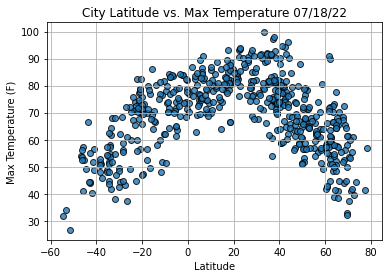

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

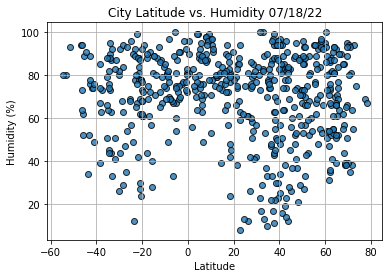

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

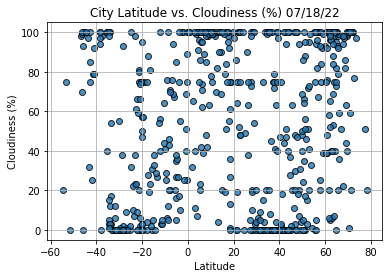

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

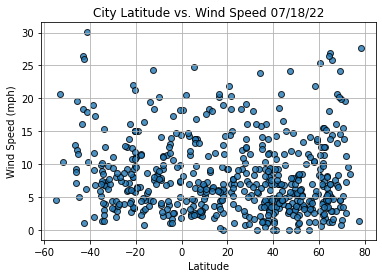

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                        Erice
Country                        IT
Date          2022-07-18 04:13:54
Lat                        38.037
Lng                       12.5865
Max Temp                    73.36
Humidity                       59
Cloudiness                      0
Wind Speed                   3.42
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
547    False
548     True
549     True
550     True
551    False
Name: Lat, Length: 552, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Blair,IN,2022-07-18 04:13:50,11.6667,92.7500,84.40,75,98,11.25
2,Beni Mazar,EG,2022-07-18 04:13:51,28.4962,30.8029,76.46,54,0,7.45
4,Hilo,US,2022-07-18 04:13:51,19.7297,-155.0900,86.29,91,100,9.22
7,Ahuimanu,US,2022-07-18 04:13:52,21.4447,-157.8378,83.91,74,75,18.41
9,Dingle,PH,2022-07-18 04:13:53,10.9995,122.6711,78.15,91,100,7.29
...,...,...,...,...,...,...,...,...,...
545,College,US,2022-07-18 04:27:46,64.8569,-147.8028,64.38,66,75,6.91
546,Marsala,IT,2022-07-18 04:27:46,37.7966,12.4352,81.93,78,0,2.30
548,Bonthe,SL,2022-07-18 04:27:47,7.5264,-12.5050,76.69,87,100,13.20
549,Elumalai,IN,2022-07-18 04:27:47,9.8667,77.7000,86.90,53,100,4.68


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Blair,IN,2022-07-18 04:13:50,11.6667,92.7500,84.40,75,98,11.25
2,Beni Mazar,EG,2022-07-18 04:13:51,28.4962,30.8029,76.46,54,0,7.45
4,Hilo,US,2022-07-18 04:13:51,19.7297,-155.0900,86.29,91,100,9.22
7,Ahuimanu,US,2022-07-18 04:13:52,21.4447,-157.8378,83.91,74,75,18.41
9,Dingle,PH,2022-07-18 04:13:53,10.9995,122.6711,78.15,91,100,7.29


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

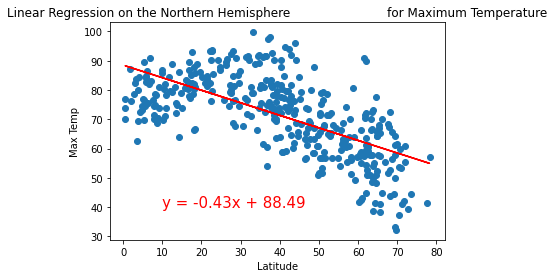

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

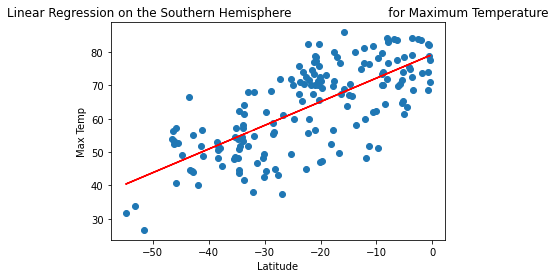

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

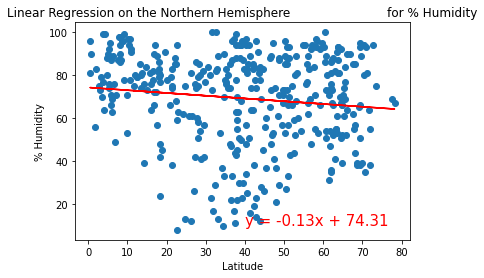

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

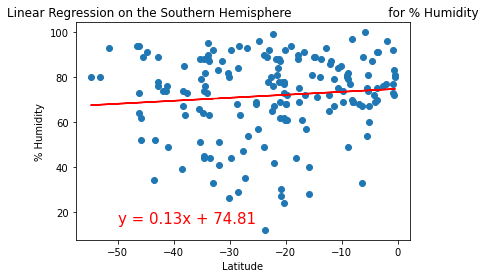

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

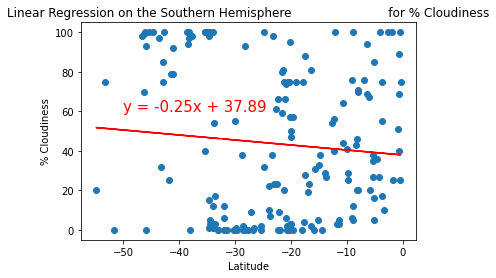

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

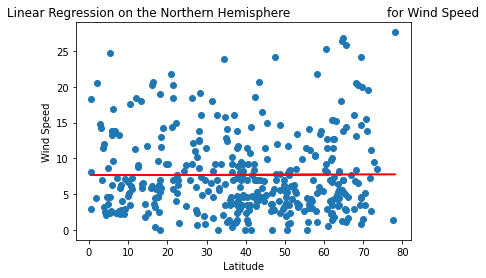

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

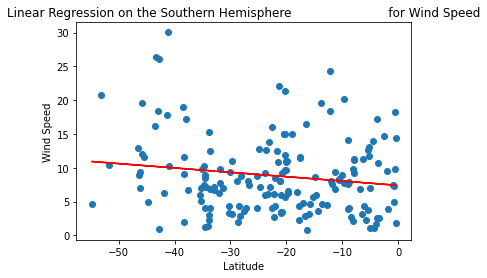

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))